In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [0]:
df = pd.read_csv('/content/drive/My Drive/COVID-19/Ontario_Confirmed_Cases.csv', index_col='Dates')

In [0]:
print(df)

            Confirmed Cases  Confirmed deaths  Confirmed Recovered
Dates                                                             
01/22/2020                0                 0                    0
01/23/2020                0                 0                    0
01/24/2020                0                 0                    0
01/25/2020                0                 0                    0
01/26/2020                1                 0                    0
...                     ...               ...                  ...
04/18/2020            11013               564                10964
04/19/2020            11561               591                11847
04/20/2020            12063               624                12543
04/21/2020            12715               694                13188
04/22/2020            13718               762                14454

[92 rows x 3 columns]


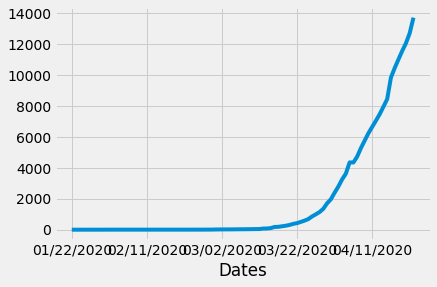

In [0]:
df['Confirmed Cases'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data = df.filter(['Confirmed Cases'])

In [0]:
dataset = data.values

In [0]:
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

74

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
scaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [7.28969237e-05],
       [7.28969237e-05],
       [7.28969237e-05],
       [7.28969237e-05],
       [7.28969237e-05],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.91587695e-04],
       [2.91587695e-04],
       [2.91587695e-04],
       [4.37381542e-04],
       [4.37381542e-04],
       [8.01866161e-04],
       [1.09345386e-03],


In [0]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.28969237e-05, 7.28969237e-05, 7.28969237e-05, 7.28969237e-05,
       7.28969237e-05, 2.18690771e-04])]
[0.00021869077124945325]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(64, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
64/64 [==============================] - 1s 17ms/step - loss: 0.0027
Epoch 2/50
64/64 [==============================] - 1s 8ms/step - loss: 9.2649e-04
Epoch 3/50
64/64 [==============================] - 1s 8ms/step - loss: 4.2146e-05
Epoch 4/50
64/64 [==============================] - 0s 8ms/step - loss: 5.9776e-05
Epoch 5/50
64/64 [==============================] - 0s 8ms/step - loss: 5.6602e-05
Epoch 6/50
64/64 [==============================] - 1s 8ms/step - loss: 7.1323e-05
Epoch 7/50
64/64 [==============================] - 0s 8ms/step - loss: 3.0014e-04
Epoch 8/50
64/64 [==============================] - 0s 8ms/step - loss: 9.5273e-05
Epoch 9/50
64/64 [==============================] - 1s 8ms/step - loss: 4.0644e-05
Epoch 10/50
64/64 [==============================] - 0s 7ms/step - loss: 6.3503e-05
Epoch 11/50
64/64 [==============================] - 0s 7ms/step - loss: 3.8423e-04
Epoch 12/50
64/64 [==============================] - 0s 8ms/step - loss: 3.2406e-05
Epoc

In [0]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])
  

In [0]:
len(test_data)

28

In [0]:
x_test = np.array(x_test)


In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
x_test

array([[[0.06254556],
        [0.07245954],
        [0.08339408],
        [0.09877533],
        [0.12436215],
        [0.14331535],
        [0.17436944],
        [0.20360111],
        [0.23727949],
        [0.26461583]],

       [[0.07245954],
        [0.08339408],
        [0.09877533],
        [0.12436215],
        [0.14331535],
        [0.17436944],
        [0.20360111],
        [0.23727949],
        [0.26461583],
        [0.31739321]],

       [[0.08339408],
        [0.09877533],
        [0.12436215],
        [0.14331535],
        [0.17436944],
        [0.20360111],
        [0.23727949],
        [0.26461583],
        [0.31739321],
        [0.31688293]],

       [[0.09877533],
        [0.12436215],
        [0.14331535],
        [0.17436944],
        [0.20360111],
        [0.23727949],
        [0.26461583],
        [0.31739321],
        [0.31688293],
        [0.34451086]],

       [[0.12436215],
        [0.14331535],
        [0.17436944],
        [0.20360111],
        [0.23727949],
  

In [0]:
len(x_test)

18

In [0]:
len(x_train)

64

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
predictions

array([[ 3737.4475],
       [ 4228.7183],
       [ 4639.8604],
       [ 5023.9966],
       [ 5429.906 ],
       [ 5848.283 ],
       [ 6272.425 ],
       [ 6681.2666],
       [ 7069.719 ],
       [ 7440.8613],
       [ 7808.2886],
       [ 8170.2603],
       [ 8671.899 ],
       [ 9180.131 ],
       [ 9651.899 ],
       [10080.843 ],
       [10465.938 ],
       [10833.584 ]], dtype=float32)

In [0]:
len(predictions)

18

In [0]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse


1022.037367078993

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


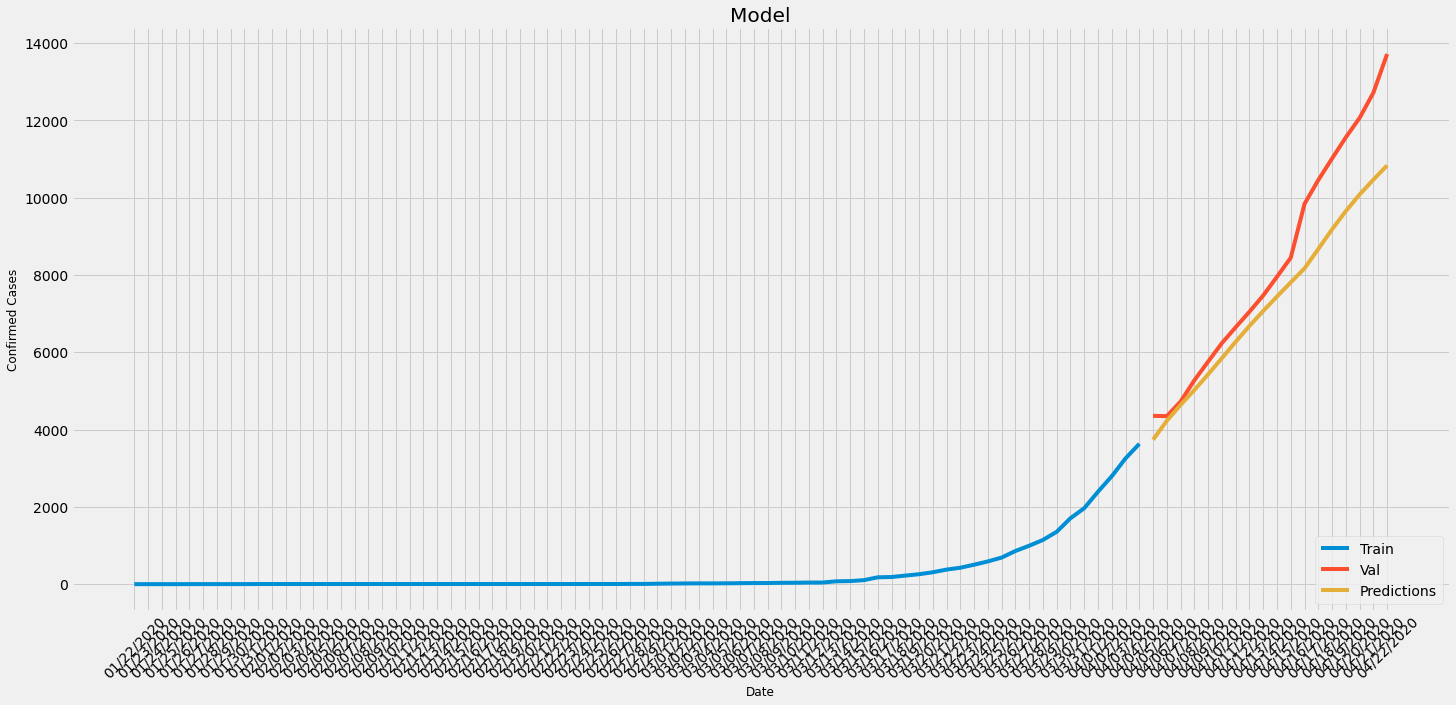

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(train['Confirmed Cases'])
plt.plot(valid[['Confirmed Cases', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
#plt.show()

In [0]:
valid

,Confirmed Cases,Predicted Cases
Dates,,
04/05/2020,4354,3737.447510
04/06/2020,4347,4228.718262
04/07/2020,4726,4639.860352
04/08/2020,5276,5023.996582
04/09/2020,5759,5429.905762
04/10/2020,6237,5848.283203
04/11/2020,6648,6272.424805
04/12/2020,7049,6681.266602
04/13/2020,7470,7069.719238


In [0]:
len(valid)

18

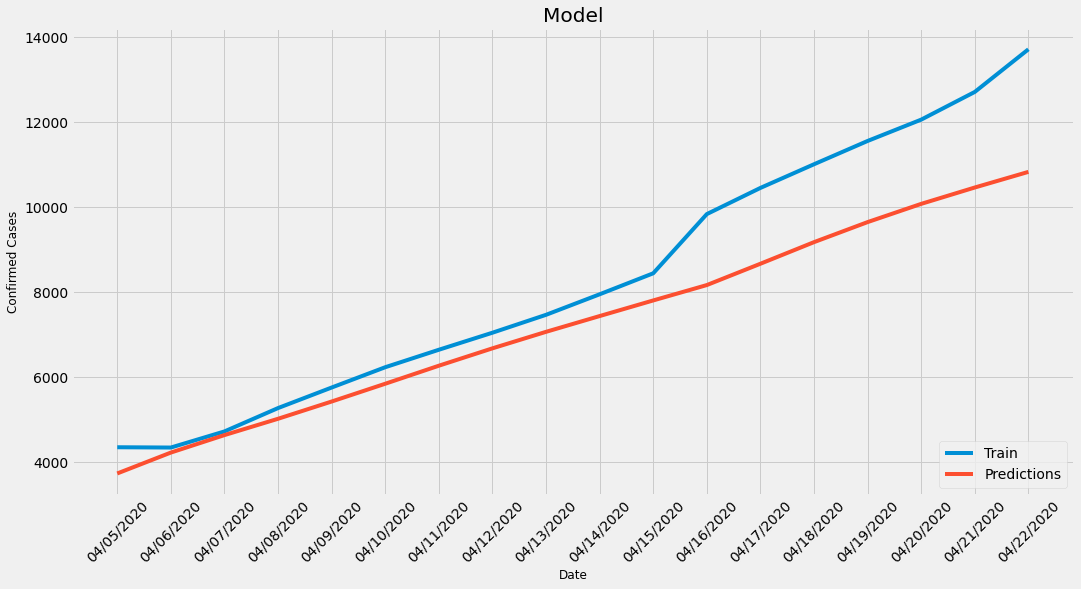

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
#plt.show()

In [0]:
from sklearn.metrics import r2_score
score = r2_score(valid['Confirmed Cases'], valid['Predicted Cases'])
print(score)

0.7954187534637067


LSTM FOR ONTARIO DEATHS

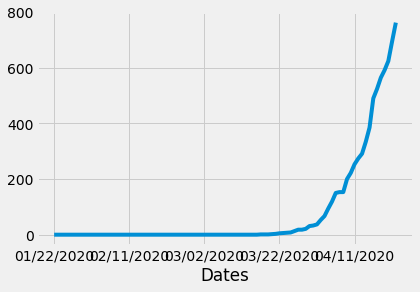

In [0]:
df2 = df['Confirmed deaths'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data2 = df.filter(['Confirmed deaths'])

In [0]:
dataset2 = data2.values

In [0]:
training_data_len2 = math.ceil(len(dataset2) * 0.8)
training_data_len2

74

In [0]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(dataset2)

In [0]:
scaled_data2

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [0]:
train_data2 = scaled_data2[0:training_data_len2, :]
x_train2 = []
y_train2 = []

for i in range(10, len(train_data2)):
  x_train2.append(train_data2[i-10:i, 0])
  y_train2.append(train_data2[i, 0])
  if i<= 10:
    print(x_train2)
    print(y_train2)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

In [0]:
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train2.shape

(64, 10, 1)

In [0]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [0]:
#compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model2.fit(x_train2, y_train2, batch_size=1, epochs=50)

Epoch 1/50
64/64 [==============================] - 1s 16ms/step - loss: 5.7532e-04
Epoch 2/50
64/64 [==============================] - 1s 8ms/step - loss: 4.5549e-04
Epoch 3/50
64/64 [==============================] - 0s 8ms/step - loss: 3.3118e-04
Epoch 4/50
64/64 [==============================] - 1s 8ms/step - loss: 1.8204e-04
Epoch 5/50
64/64 [==============================] - 0s 7ms/step - loss: 5.6328e-05
Epoch 6/50
64/64 [==============================] - 0s 8ms/step - loss: 9.1171e-05
Epoch 7/50
64/64 [==============================] - 0s 7ms/step - loss: 3.8989e-05
Epoch 8/50
64/64 [==============================] - 0s 7ms/step - loss: 1.5892e-04
Epoch 9/50
64/64 [==============================] - 0s 7ms/step - loss: 2.4513e-05
Epoch 10/50
64/64 [==============================] - 0s 7ms/step - loss: 1.4888e-05
Epoch 11/50
64/64 [==============================] - 1s 8ms/step - loss: 4.3116e-05
Epoch 12/50
64/64 [==============================] - 0s 7ms/step - loss: 5.3777e-05


In [0]:
test_data2 = scaled_data2[training_data_len2-10: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(10, len(test_data2)):
  x_test2.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data2)

28

In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

In [0]:
predictions2 = model.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)

In [0]:
rmse = np.sqrt( np.mean( predictions2 - y_test )**2)
rmse

8001.996246761746

In [0]:
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2:]
valid2['Predicted Deaths'] = predictions2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
valid2


,Confirmed deaths,Predicted Deaths
Dates,,
04/05/2020,119,96.256805
04/06/2020,150,116.477837
04/07/2020,153,141.047485
04/08/2020,153,162.888855
04/09/2020,200,179.816589
04/10/2020,222,202.103806
04/11/2020,253,226.237625
04/12/2020,274,252.496918
04/13/2020,291,278.094208


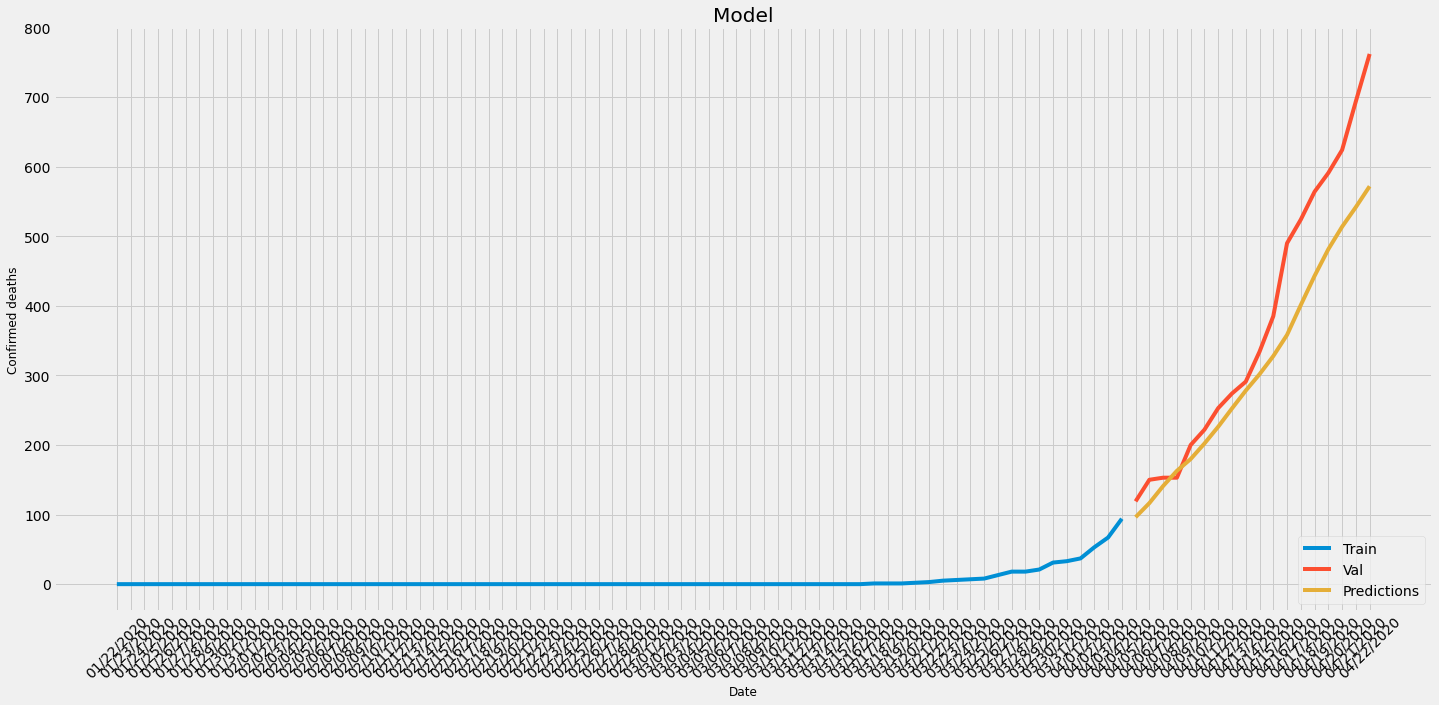

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed deaths', fontsize=12)
plt.plot(train2['Confirmed deaths'])
plt.plot(valid2[['Confirmed deaths', 'Predicted Deaths']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

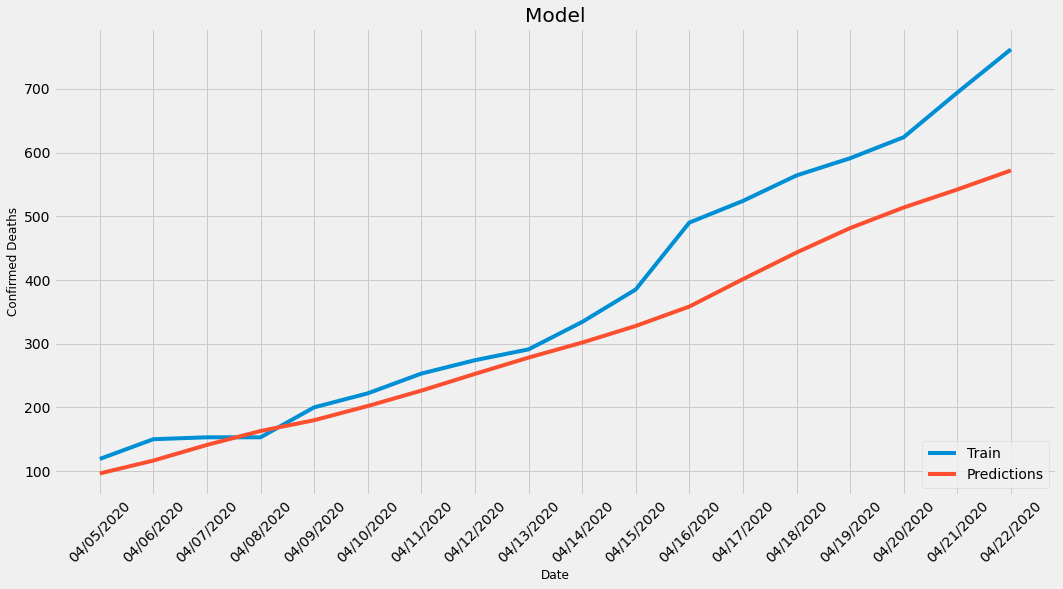

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Deaths', fontsize=12)
plt.plot(valid2)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

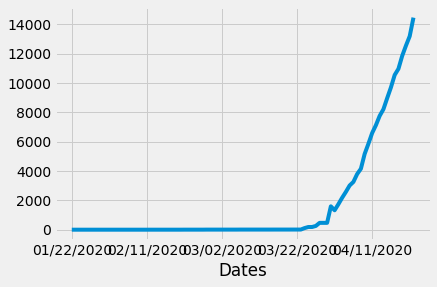

In [0]:
df2 = df['Confirmed Recovered'].plot()


In [0]:
data3 = df.filter(['Confirmed Recovered'])

In [0]:
dataset3 = data3.values

In [0]:
training_data_len3 = math.ceil(len(dataset3) * 0.8)
training_data_len3

74

In [0]:
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler.fit_transform(dataset3)

In [0]:
scaled_data3

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [4.15110004e-04],
       [4.15110004e-04],
       [4.15110004e-04],
       [4.15110004e-04],


In [0]:
train_data3 = scaled_data3[0:training_data_len2, :]
x_train3 = []
y_train3 = []

for i in range(10, len(train_data3)):
  x_train3.append(train_data3[i-10:i, 0])
  y_train3.append(train_data3[i, 0])
  if i<= 10:
    print(x_train3)
    print(y_train3)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [0]:
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(64, 10, 1)

In [0]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

In [0]:
model3.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
64/64 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 2/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 3/50
64/64 [==============================] - 1s 8ms/step - loss: 6.2827e-04
Epoch 4/50
64/64 [==============================] - 1s 8ms/step - loss: 1.5722e-04
Epoch 5/50
64/64 [==============================] - 1s 8ms/step - loss: 1.9746e-04
Epoch 6/50
64/64 [==============================] - 1s 8ms/step - loss: 1.9758e-04
Epoch 7/50
64/64 [==============================] - 1s 9ms/step - loss: 2.3700e-04
Epoch 8/50
64/64 [==============================] - 1s 8ms/step - loss: 1.2582e-04
Epoch 9/50
64/64 [==============================] - 1s 8ms/step - loss: 2.4093e-04
Epoch 10/50
64/64 [==============================] - 1s 8ms/step - loss: 1.3728e-04
Epoch 11/50
64/64 [==============================] - 1s 8ms/step - loss: 2.1079e-04
Epoch 12/50
64/64 [==============================] - 1s 8ms/step - loss: 4.3012e-04
Epoch 13

In [0]:
test_data3 = scaled_data3[training_data_len3-10: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(10, len(test_data3)):
  x_test3.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data3)

28

In [0]:
x_test3 = np.array(x_test3)

In [0]:
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

In [0]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)

In [0]:
rmse = np.sqrt( np.mean( predictions3 - y_test )**2)
rmse

2415.7205268012153

In [0]:
train3 = data3[:training_data_len3]
valid3 = data3[training_data_len3:]
valid3['Predicted Recovered Cases'] = predictions3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
valid3


,Confirmed Recovered,Predicted Recovered Cases
Dates,,
04/05/2020,3012,1825.847656
04/06/2020,3256,2209.410156
04/07/2020,3791,2675.459717
04/08/2020,4154,3089.758057
04/09/2020,5162,3410.851807
04/10/2020,5855,3833.606934
04/11/2020,6589,4291.389160
04/12/2020,7123,4789.488770
04/13/2020,7758,5275.030762


In [0]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,Confirmed Cases,Predicted Cases,Confirmed deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered Cases
Dates,,,,,,
04/05/2020,4354,3737.447510,119,96.256805,3012,1825.847656
04/06/2020,4347,4228.718262,150,116.477837,3256,2209.410156
04/07/2020,4726,4639.860352,153,141.047485,3791,2675.459717
04/08/2020,5276,5023.996582,153,162.888855,4154,3089.758057
04/09/2020,5759,5429.905762,200,179.816589,5162,3410.851807
04/10/2020,6237,5848.283203,222,202.103806,5855,3833.606934
04/11/2020,6648,6272.424805,253,226.237625,6589,4291.389160
04/12/2020,7049,6681.266602,274,252.496918,7123,4789.488770
04/13/2020,7470,7069.719238,291,278.094208,7758,5275.030762


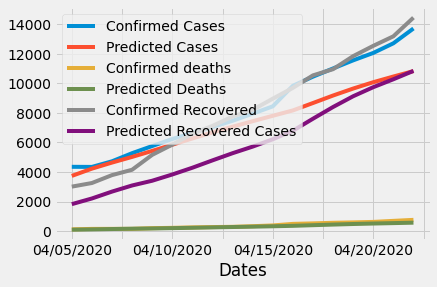

In [0]:
valid_final.plot()

In [0]:
score = r2_score(valid_final['Confirmed Cases'], valid_final['Predicted Cases'])
score

0.7954187534637067

In [0]:
score1 = r2_score(valid_final['Confirmed deaths'], valid_final['Predicted Deaths'])
score1

0.8107360175999616

In [0]:
score3 = r2_score(valid_final['Confirmed Recovered'], valid_final['Predicted Recovered Cases'])
score3

0.5276571307793475

In [0]:

Average = (score + score1 + score3) / 3
Average

0.711270633947672